In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

In [3]:
import pandas as pd


In [4]:
website ='https://www.cars.com/shopping/results/?stock_type=all&makes%5B%5D=&models%5B%5D=&list_price_max=&maximum_distance=all&zip='

In [5]:
response = requests.get(website)

In [6]:
response.status_code

200

In [7]:
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">New and used vehicles for Sale Near Me | Cars.com</title>
<meta content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="New and used vehicles for Sale Near Me | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results/" property="og:url"/>
<meta content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." property="og:description"/>
<meta content="https://graphi

In [9]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [10]:
len(results)

20

In [11]:
results[0].find('h2').get_text()

'2018 Audi RS 5 2.9T'

In [12]:
results[0].find('div', {'class':'mileage'}).get_text()

'14,588 mi.'

In [13]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
       mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
    except:
        rating.append('n/a')
    
    # review_count
    try:
        review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
    except:
        review_count.append('n/a')
    
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

In [14]:
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [15]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Audi RS 5 2.9T,"14,588 mi.",THE COLLECTION,4.7,(579 reviews),"$69,600"
1,2019 Kia Stinger GT2,"26,121 mi.",Luxury Motorsports,4.4,(80 reviews),"$43,988"
2,2019 Kia Stinger GT2,"10,309 mi.",Mark Kia,4.4,"(1,514 reviews)","$43,950"
3,2017 Lexus GS 350 F Sport,"48,182 mi.",Merlex Auto Group,3.8,(358 reviews),"$31,399"
4,2018 Audi Q7 2.0T Premium Plus,"60,461 mi.",Audi Pembroke Pines,4.6,(209 reviews),"$37,769"
5,2014 Mercedes-Benz G-Class G 550,"68,684 mi.",21 Century Auto Group,4.2,"(1,292 reviews)","$71,995"
6,2018 Porsche Macan S,"42,850 mi.",Hanna Imports,4.8,"(1,356 reviews)","$48,978"
7,2018 Toyota 4Runner SR5 Premium,"34,010 mi.",NexGen Motors,3.0,(11 reviews),"$34,250"
8,2019 Toyota Tundra SR5,"23,087 mi.",Toyota of Boardman,3.9,(46 reviews),"$46,990"
9,2018 Maserati Quattroporte S Q4 GranLusso,"42,326 mi.",Maserati Alfa Romeo of Wilmington Pike,3.5,(36 reviews),"$62,379"


In [16]:
car_dealer['Review Count'] = car_dealer['Review Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Audi RS 5 2.9T,"14,588 mi.",THE COLLECTION,4.7,579,"$69,600"
1,2019 Kia Stinger GT2,"26,121 mi.",Luxury Motorsports,4.4,80,"$43,988"
2,2019 Kia Stinger GT2,"10,309 mi.",Mark Kia,4.4,"1,514","$43,950"
3,2017 Lexus GS 350 F Sport,"48,182 mi.",Merlex Auto Group,3.8,358,"$31,399"
4,2018 Audi Q7 2.0T Premium Plus,"60,461 mi.",Audi Pembroke Pines,4.6,209,"$37,769"
5,2014 Mercedes-Benz G-Class G 550,"68,684 mi.",21 Century Auto Group,4.2,"1,292","$71,995"
6,2018 Porsche Macan S,"42,850 mi.",Hanna Imports,4.8,"1,356","$48,978"
7,2018 Toyota 4Runner SR5 Premium,"34,010 mi.",NexGen Motors,3.0,11,"$34,250"
8,2019 Toyota Tundra SR5,"23,087 mi.",Toyota of Boardman,3.9,46,"$46,990"
9,2018 Maserati Quattroporte S Q4 GranLusso,"42,326 mi.",Maserati Alfa Romeo of Wilmington Pike,3.5,36,"$62,379"


In [ ]:
car_dealer['Mileage'] = car_dealer['Mileage'].apply(lambda x: x.strip('mi.'))

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Audi RS 5 2.9T,"14,588",THE COLLECTION,4.7,579,"$69,600"
1,2019 Kia Stinger GT2,"26,121",Luxury Motorsports,4.4,80,"$43,988"
2,2019 Kia Stinger GT2,"10,309",Mark Kia,4.4,"1,514","$43,950"
3,2017 Lexus GS 350 F Sport,"48,182",Merlex Auto Group,3.8,358,"$31,399"
4,2018 Audi Q7 2.0T Premium Plus,"60,461",Audi Pembroke Pines,4.6,209,"$37,769"
5,2014 Mercedes-Benz G-Class G 550,"68,684",21 Century Auto Group,4.2,"1,292","$71,995"
6,2018 Porsche Macan S,"42,850",Hanna Imports,4.8,"1,356","$48,978"
7,2018 Toyota 4Runner SR5 Premium,"34,010",NexGen Motors,3.0,11,"$34,250"
8,2019 Toyota Tundra SR5,"23,087",Toyota of Boardman,3.9,46,"$46,990"
9,2018 Maserati Quattroporte S Q4 GranLusso,"42,326",Maserati Alfa Romeo of Wilmington Pike,3.5,36,"$62,379"


In [ ]:
car_dealer.to_excel('car_dealer_single_page.xlsx', index=False)

In [ ]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for i in range (1,11):
    
    # website in variable
    website = 'https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&dealer_id=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=cpo&year_max=&year_min=&zip=' 
    
    # request to website
    response = requests.get(website)
    
    # soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class' : 'vehicle-card'})
    
    # loop through results
    for result in results:
    
        # name
        try:
            name.append(result.find('h2').get_text()) 
        except:
            name.append('n/a')

        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append('n/a')

        # dealer_name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
        except:
            dealer_name.append('n/a')

        # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
        except:
            rating.append('n/a')

        # review_count
        try:
            review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
        except:
            review_count.append('n/a')

        #price 
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append('n/a')

In [ ]:
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Mercedes-Benz AMG C 63 S,"47,469 mi.",Mercedes-Benz of Laguna Niguel,4.8,"(1,455 reviews)","$66,488"
1,2019 Mercedes-Benz C-Class C 300,"20,419 mi.",Mercedes-Benz of Arcadia,4.8,"(1,083 reviews)","$42,568"
2,2018 Mercedes-Benz C-Class C 300 4MATIC,"20,528 mi.",Mercedes-Benz of Massapequa,4.8,"(1,544 reviews)","$35,995"
3,2020 Mercedes-Benz GLB 250 4MATIC,"11,973 mi.",Mercedes-Benz of Pittsburgh,4.8,(64 reviews),"$42,997"
4,2019 Mercedes-Benz GLC 300 Base,"27,019 mi.",House of Imports,4.8,(882 reviews),"$35,985"
...,...,...,...,...,...,...
195,2018 Mercedes-Benz GLE 350 Base 4MATIC,"41,730 mi.",Sears Imported Autos,4.9,"(1,660 reviews)","$39,884"
196,2020 Mercedes-Benz AMG C 43 Base 4MATIC,"10,598 mi.",Mercedes-Benz of Scottsdale,4.7,(154 reviews),"$63,991"
197,2018 Mercedes-Benz GLA 250 Base 4MATIC,"27,569 mi.",Mercedes Benz of Centerville,n/a,n/a,"$32,980"
198,2019 Mercedes-Benz C-Class C 300 4MATIC,"19,528 mi.",Mercedes-Benz of Bellevue,4.7,(482 reviews),"$38,995"


In [ ]:
car_dealer['Review Count'] = car_dealer['Review Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [ ]:
car_dealer['Mileage'] = car_dealer['Mileage'].apply(lambda x: x.strip('mi.'))

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Mercedes-Benz AMG C 63 S,"47,469",Mercedes-Benz of Laguna Niguel,4.8,"1,455","$66,488"
1,2019 Mercedes-Benz C-Class C 300,"20,419",Mercedes-Benz of Arcadia,4.8,"1,083","$42,568"
2,2018 Mercedes-Benz C-Class C 300 4MATIC,"20,528",Mercedes-Benz of Massapequa,4.8,"1,544","$35,995"
3,2020 Mercedes-Benz GLB 250 4MATIC,"11,973",Mercedes-Benz of Pittsburgh,4.8,64,"$42,997"
4,2019 Mercedes-Benz GLC 300 Base,"27,019",House of Imports,4.8,882,"$35,985"
...,...,...,...,...,...,...
195,2018 Mercedes-Benz GLE 350 Base 4MATIC,"41,730",Sears Imported Autos,4.9,"1,660","$39,884"
196,2020 Mercedes-Benz AMG C 43 Base 4MATIC,"10,598",Mercedes-Benz of Scottsdale,4.7,154,"$63,991"
197,2018 Mercedes-Benz GLA 250 Base 4MATIC,"27,569",Mercedes Benz of Centerville,n/a,n/a,"$32,980"
198,2019 Mercedes-Benz C-Class C 300 4MATIC,"19,528",Mercedes-Benz of Bellevue,4.7,482,"$38,995"


In [ ]:
dataset=df_no_mv=car_dealer

In [ ]:
dataset.head(5)


,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2018 Mercedes-Benz AMG C 63 S,"47,469",Mercedes-Benz of Laguna Niguel,4.8,"1,455","$66,488"
1,2019 Mercedes-Benz C-Class C 300,"20,419",Mercedes-Benz of Arcadia,4.8,"1,083","$42,568"
2,2018 Mercedes-Benz C-Class C 300 4MATIC,"20,528",Mercedes-Benz of Massapequa,4.8,"1,544","$35,995"
3,2020 Mercedes-Benz GLB 250 4MATIC,"11,973",Mercedes-Benz of Pittsburgh,4.8,64,"$42,997"
4,2019 Mercedes-Benz GLC 300 Base,"27,019",House of Imports,4.8,882,"$35,985"


In [ ]:
car_dealer.to_excel('car_dealer_multi_page.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt 

(array([26., 35., 24., 20., 22., 15., 23., 14., 12.,  9.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

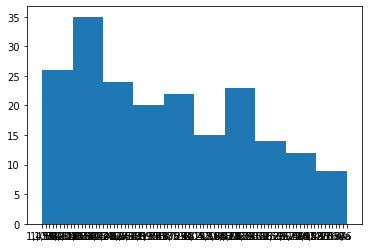

In [ ]:
plt.hist(dataset['Review Count'])


(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

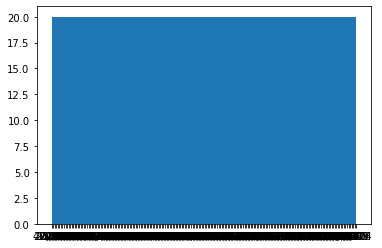

In [ ]:
plt.hist(dataset['Mileage'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          200 non-null    object
 1   Mileage       200 non-null    object
 2   Dealer Name   200 non-null    object
 3   Rating        200 non-null    object
 4   Review Count  200 non-null    object
 5   Price         200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB
